Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuaƟon using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribuƟon (excluding stopwords).

In [1]:
!pip install nltk==3.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Lowercase Text without Punctuation:
 technology is constantly evolving transforming the way we live and work
from smartphones to artificial intelligence every innovation shapes our future
i find it fascinating how technology bridges distances connects people and automates tasks
it improves healthcare education and even entertainment
with each passing year new breakthroughs continue to redefine possibilities
technology is not just a toolits a force that reshapes our world

Sentences:
 ['technology is constantly evolving transforming the way we live and work\nfrom smartphones to artificial intelligence every innovation shapes our future\ni find it fascinating how technology bridges distances connects people and automates tasks\nit improves healthcare education and even entertainment\nwith each passing year new breakthroughs continue to redefine possibilities\ntechnology is not just a toolits a force that reshapes our world']

Words (split()):
 ['technology', 'is', 'constantly', 'evolving

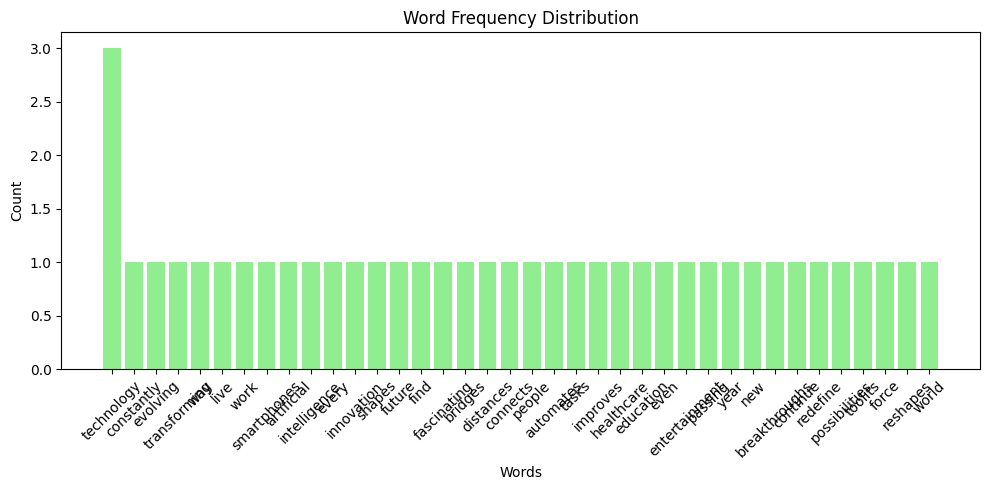

In [3]:
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

text = """Technology is constantly evolving, transforming the way we live and work.
From smartphones to artificial intelligence, every innovation shapes our future.
I find it fascinating how technology bridges distances, connects people, and automates tasks.
It improves healthcare, education, and even entertainment.
With each passing year, new breakthroughs continue to redefine possibilities.
Technology is not just a tool—it’s a force that reshapes our world."""

text = text.lower()
text = re.sub(r'[^\w\s]', '', text)

sentences = sent_tokenize(text)
split_words = text.split()
tokenized_words = word_tokenize(text)

stop_words = set(stopwords.words('english'))
filtered = [w for w in tokenized_words if w not in stop_words]

freq = Counter(filtered)

print("Lowercase Text without Punctuation:\n", text)
print("\nSentences:\n", sentences)
print("\nWords (split()):\n", split_words)
print("\nWords (word_tokenize()):\n", tokenized_words)
print("\nFiltered Words (No Stopwords):\n", filtered)
print("\nWord Frequency:\n")
for word, count in freq.items():
    print(f"{word}: {count}")

plt.figure(figsize=(10, 5))
plt.bar(freq.keys(), freq.values(), color='lightgreen')
plt.xticks(rotation=45)
plt.title("Word Frequency Distribution")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Q2. Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmatizatiƟon with WordNetLemmatizer
5. Compare the stemmed and lemmatized outputs and explain when you’d prefer one over the other.

In [4]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

text = """Technology is constantly evolving, transforming the way we live and work.
From smartphones to artificial intelligence, every innovation shapes our future.
I find it fascinating how technology bridges distances, connects people, and automates tasks.
It improves healthcare, education, and even entertainment.
With each passing year, new breakthroughs continue to redefine possibilities.
Technology is not just a tool—it’s a force that reshapes our world."""

text = text.lower()
text = re.sub(r'[^\w\s]', '', text)

words_alpha = re.findall(r'\b[a-zA-Z]+\b', text)
stop_words = set(stopwords.words('english'))
filtered = [w for w in words_alpha if w not in stop_words]

porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed = [porter.stem(w) for w in filtered]
lemmatized = [lemmatizer.lemmatize(w) for w in filtered]

print("Alphabetic Words:\n", words_alpha)
print("\nFiltered Words (No Stopwords):\n", filtered)
print("\nStemmed Words:\n", stemmed)
print("\nLemmatized Words:\n", lemmatized)

print("\nComparison:")
print("Stemming gives shorter, base forms that may not be real words (e.g., 'technolog').")
print("Lemmatization gives dictionary-valid root forms (e.g., 'technology' stays 'technology').")
print("Lemmatization is better for tasks needing accurate meaning, like language modeling.")
print("Stemming is faster and better for quick text processing when perfect grammar isn't needed.")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Alphabetic Words:
 ['technology', 'is', 'constantly', 'evolving', 'transforming', 'the', 'way', 'we', 'live', 'and', 'work', 'from', 'smartphones', 'to', 'artificial', 'intelligence', 'every', 'innovation', 'shapes', 'our', 'future', 'i', 'find', 'it', 'fascinating', 'how', 'technology', 'bridges', 'distances', 'connects', 'people', 'and', 'automates', 'tasks', 'it', 'improves', 'healthcare', 'education', 'and', 'even', 'entertainment', 'with', 'each', 'passing', 'year', 'new', 'breakthroughs', 'continue', 'to', 'redefine', 'possibilities', 'technology', 'is', 'not', 'just', 'a', 'toolits', 'a', 'force', 'that', 'reshapes', 'our', 'world']

Filtered Words (No Stopwords):
 ['technology', 'constantly', 'evolving', 'transforming', 'way', 'live', 'work', 'smartphones', 'artificial', 'intelligence', 'every', 'innovation', 'shapes', 'future', 'find', 'fascinating', 'technology', 'bridges', 'distances', 'connects', 'people', 'automates', 'tasks', 'improves', 'healthcare', 'education', 'even',

Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representation.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

texts = [
    "Apple releases new iPhone with better camera and battery life.",
    "The movie was a thrilling experience with outstanding acting.",
    "Customers love the new coffee flavor and fast delivery service."
]

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(texts)

print("Bag of Words (CountVectorizer):")
print(count_matrix.toarray())
print("\nFeature Names:\n", count_vectorizer.get_feature_names_out())

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_array = tfidf_matrix.toarray()

print("\nTF-IDF Scores:")
for i, text_vec in enumerate(tfidf_array):
    print(f"\nText {i+1}:")
    top_indices = np.argsort(text_vec)[-3:][::-1]
    for idx in top_indices:
        print(f"{feature_names[idx]}: {text_vec[idx]:.4f}")


Bag of Words (CountVectorizer):
[[0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0]]

Feature Names:
 ['acting' 'and' 'apple' 'battery' 'better' 'camera' 'coffee' 'customers'
 'delivery' 'experience' 'fast' 'flavor' 'iphone' 'life' 'love' 'movie'
 'new' 'outstanding' 'releases' 'service' 'the' 'thrilling' 'was' 'with']

TF-IDF Scores:

Text 1:
releases: 0.3383
camera: 0.3383
apple: 0.3383

Text 2:
was: 0.3738
thrilling: 0.3738
outstanding: 0.3738

Text 3:
service: 0.3383
fast: 0.3383
customers: 0.3383


Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:<br>
a. Jaccard Similarity using sets<br>
b. Cosine Similarity using TfidfVectorizer + cosine_similarity()<br>
c. Analyze which similarity metric gives beƩer insights in your case.

In [6]:
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

text1 = """Artificial Intelligence is the simulation of human intelligence by machines.
It enables systems to learn, reason, and self-correct over time.
AI powers virtual assistants, smart devices, and recommendation engines.
It is widely used in healthcare, finance, and autonomous vehicles."""

text2 = """Blockchain is a decentralized digital ledger for recording transactions.
It ensures transparency, security, and immutability of data.
Blockchain is used in cryptocurrencies, supply chains, and voting systems.
It eliminates the need for intermediaries in trust-based systems."""

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered = [w for w in tokens if w not in stop_words]
    return filtered

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

set1 = set(tokens1)
set2 = set(tokens2)

intersection = set1.intersection(set2)
union = set1.union(set2)
jaccard_sim = len(intersection) / len(union)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

print("Jaccard Similarity:", round(jaccard_sim, 4))
print("Cosine Similarity:", round(cosine_sim, 4))

print("\nAnalysis:")
print("Jaccard checks overlap of unique words, so it’s simple but ignores frequency and context.")
print("Cosine considers importance and frequency of words using TF-IDF, giving better insights for larger or more descriptive texts.")
print("In this case, cosine similarity captures more meaningful comparison between the tech descriptions.")


Jaccard Similarity: 0.0455
Cosine Similarity: 0.2666

Analysis:
Jaccard checks overlap of unique words, so it’s simple but ignores frequency and context.
Cosine considers importance and frequency of words using TF-IDF, giving better insights for larger or more descriptive texts.
In this case, cosine similarity captures more meaningful comparison between the tech descriptions.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjectivity for each review.
2. Classify reviews into Positive / Negative / Neutral.
3. Create a word cloud using the wordcloud library for all positive reviews.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Review Analysis:

Review 1:
Text: The phone battery lasts all day and charges quickly. I'm very happy with it!
Polarity: 1.00, Subjectivity: 1.00, Sentiment: Positive

Review 2:
Text: Terrible experience. The screen cracked within a week and support was unhelpful.
Polarity: -1.00, Subjectivity: 1.00, Sentiment: Negative

Review 3:
Text: It's okay. The performance is average but the design is nice.
Polarity: 0.32, Subjectivity: 0.63, Sentiment: Positive

Review 4:
Text: Absolutely love the camera quality and smooth performance.
Polarity: 0.45, Subjectivity: 0.55, Sentiment: Positive

Review 5:
Text: Not worth the price. I expected better features at this cost.
Polarity: 0.08, Subjectivity: 0.33, Sentiment: Neutral



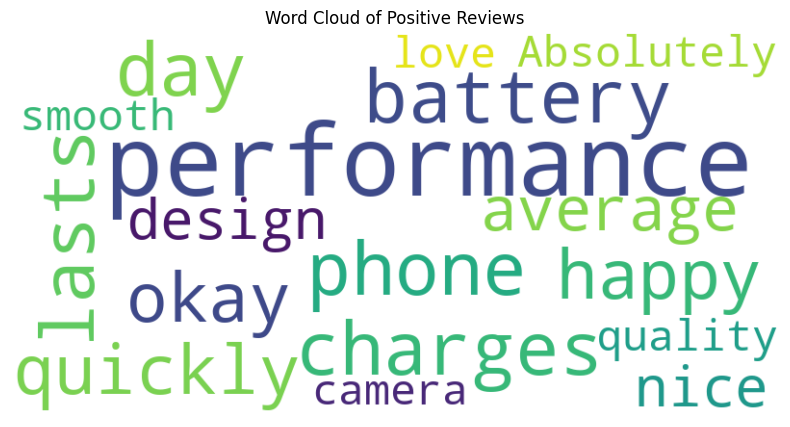

In [7]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

reviews = [
    "The phone battery lasts all day and charges quickly. I'm very happy with it!",
    "Terrible experience. The screen cracked within a week and support was unhelpful.",
    "It's okay. The performance is average but the design is nice.",
    "Absolutely love the camera quality and smooth performance.",
    "Not worth the price. I expected better features at this cost."
]

polarities = []
subjectivities = []
sentiments = []

for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    polarities.append(polarity)
    subjectivities.append(subjectivity)

    if polarity > 0.1:
        sentiments.append("Positive")
    elif polarity < -0.1:
        sentiments.append("Negative")
    else:
        sentiments.append("Neutral")

print("Review Analysis:\n")
for i in range(len(reviews)):
    print(f"Review {i+1}:")
    print(f"Text: {reviews[i]}")
    print(f"Polarity: {polarities[i]:.2f}, Subjectivity: {subjectivities[i]:.2f}, Sentiment: {sentiments[i]}\n")

positive_text = " ".join([reviews[i] for i in range(len(reviews)) if sentiments[i] == "Positive"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")
plt.show()


Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starting from any seed word you provide.

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

paragraph = """Technology continues to revolutionize how we live and work every day.
From smart devices to artificial intelligence, innovation is reshaping every aspect of our lives.
The rapid advancement in tools, software, and connectivity is making the world more efficient and connected.
Technology empowers people to create, learn, and communicate better than ever before.
With every passing year, the possibilities of what technology can achieve keep expanding."""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
token_list = tokenizer.texts_to_sequences([paragraph])[0]

for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_sequences.append(n_gram_seq)

max_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]
ys = to_categorical(labels, num_classes=total_words)

model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(xs, ys, epochs=200, verbose=0)

def generate_text(seed, num_words):
    for _ in range(num_words):
        token_seq = tokenizer.texts_to_sequences([seed])[0]
        token_seq = pad_sequences([token_seq], maxlen=max_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_seq, verbose=0), axis=-1)
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed += ' ' + word
                break
    return seed

seed_text = "technology"
new_text = generate_text(seed_text, 10)
print("Generated Text:\n", new_text)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Generated Text:
 technology continues continues live live live live work day day smart
